In [2]:
## This notebook will be used to make a head to head comparison with GI scores calculated in the Simpson&Ling et al. manuscript

## plots generated using this notebook are used in Figures 2H&I

In [3]:
## import modules

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from matplotlib_venn import venn2
from matplotlib_venn import venn3
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [4]:
def upperTriangle(matrix, k=1):
    keep = np.triu(np.ones(matrix.shape), k=k).astype('bool').reshape(matrix.size)
    return matrix.stack(future_stack = True).loc[keep]

In [6]:
## import data

## Download the "gamma map" from the Simpson&Ling manuscript, as this is directly comparable to our refernece (dmso) maps. Raw data 
## available at https://parpi.princeton.edu/map/
brit_dmso = pd.read_excel('/Users/benh/Desktop/britt_gamma_map.xlsx',index_col = 0)

## gene level reference GI maps 
dmso1_map = pd.read_excel('/Users/benh/Desktop/GI_data/gene_maps/dmso1_map.xlsx',index_col = 0)
dmso2_map = pd.read_excel('/Users/benh/Desktop/GI_data/gene_maps/dmso2_map.xlsx',index_col = 0)

In [7]:
## Find the overlap between the Simpson&Ling single gene set and ours

intersect = list(set(brit_dmso.index).intersection(dmso1_map.index))
print(len(intersect))

100


In [15]:
## Subset our dataset with theirs based on shared gene overlap

brit_dmso_new = brit_dmso.loc[intersect,intersect]
dmso1_map_new = dmso1_map.loc[intersect,intersect]
dmso2_map_new = dmso2_map.loc[intersect,intersect]

In [21]:
## define a colormap

colors = ['mediumturquoise','dimgray','gold']
cmap1 = mcolors.LinearSegmentedColormap.from_list('yellow_gray_blue', colors)
norm = Normalize(vmin = -10, vmax = 10)

/var/folders/wj/l9cwkbvn3f3b12_8zbvnd4500000gp/T/ipykernel_40148/53640928.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(upperTriangle(brit_dmso_new).values,


PearsonRResult(statistic=np.float64(0.6096569459500191), pvalue=np.float64(0.0))

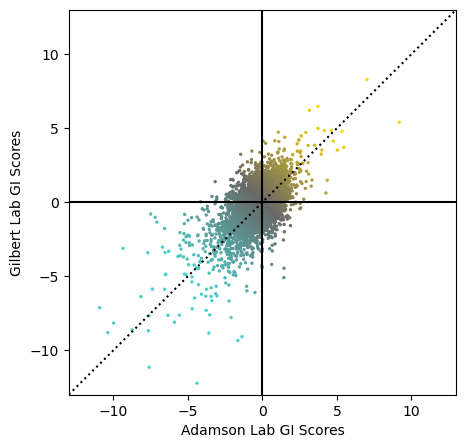

In [11]:
## Make a scatterplot of the comparison of the Simpson&Ling gamma map scores to our reference1 scores

plt.figure(figsize=(5,5))
plt.scatter(upperTriangle(brit_dmso_new).values,
            upperTriangle(dmso1_map_new).values,
            s=2,
           cmap = cmap1,
           c = [cmap1(norm(val)) for val in upperTriangle(brit_dmso_new).values+upperTriangle(dmso1_map_new).values])
plt.xlabel('Adamson Lab GI Scores')
plt.ylabel('Gilbert Lab GI Scores')
plt.xlim(-13,13)
plt.ylim(-13,13)
plt.plot((-20,13),(-20,13),':',color = 'black')
plt.plot((-20,13),(0,0),color = 'black')
plt.plot((0,0),(-20,13),color = 'black')
#plt.savefig('/Users/benh/Desktop/for_rebuttal/interlab_comparison.png',dpi=300)
stats.pearsonr(upperTriangle(brit_dmso_new).values,upperTriangle(dmso1_map_new).values)

PearsonRResult(statistic=np.float64(0.5691733373216536), pvalue=np.float64(0.0))

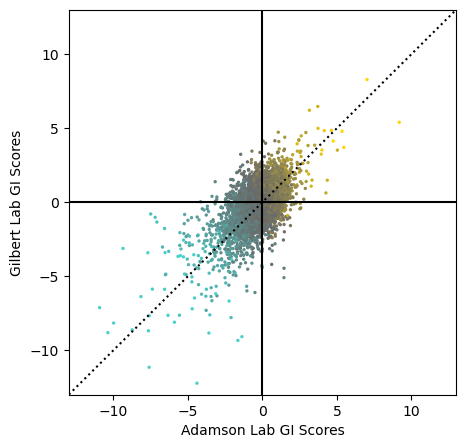

In [22]:
## Make a scatterplot of the comparison of the Simpson&Ling gamma map scores to our reference2 scores

plt.figure(figsize=(5,5))
plt.scatter(upperTriangle(brit_dmso_new).values,
            upperTriangle(dmso1_map_new).values,
            s=2,
           c = [cmap1(norm(val)) for val in upperTriangle(brit_dmso_new).values+upperTriangle(dmso2_map_new).values]
           )
plt.xlabel('Adamson Lab GI Scores')
plt.ylabel('Gilbert Lab GI Scores')
plt.xlim(-13,13)
plt.ylim(-13,13)
plt.plot((-20,13),(-20,13),':',color = 'black')
plt.plot((-20,13),(0,0),color = 'black')
plt.plot((0,0),(-20,13),color = 'black')
#plt.savefig('/Users/benh/Desktop/for_rebuttal/interlab_comparison.png',dpi=300)
stats.pearsonr(upperTriangle(brit_dmso_new).values,upperTriangle(dmso2_map_new).values)

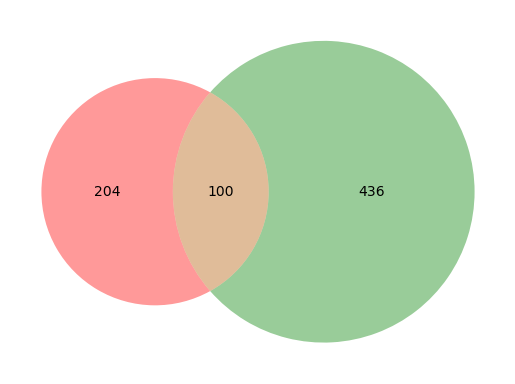

In [17]:
## Make a venn diagram in the overlap of single genes between the experiments

set1 = set(dmso1_map.index)
set2 = set(brit_dmso.index)

venn_test = venn2([set1, set2], ('', ''))


#plt.savefig('/Users/benh/Desktop/for_rebuttal/interlab_venn.png',dpi=300)